In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/content/real_estate_price_size_year (1).csv')

In [3]:
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [4]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


<Axes: xlabel='price', ylabel='size'>

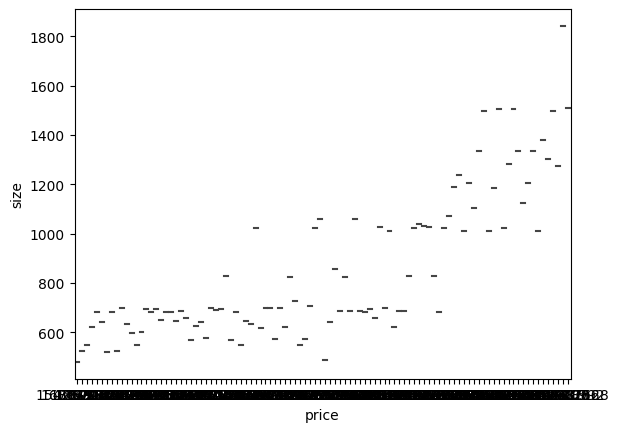

In [6]:
sns.violinplot(x='price', y='size', data=data)

<Axes: >

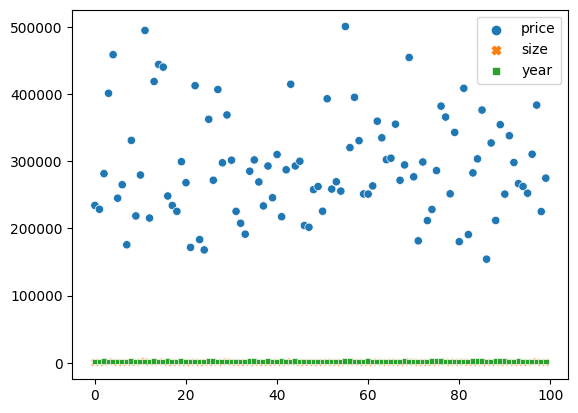

In [8]:
sns.scatterplot(data)

In [9]:
X = data[['size', 'year']]
y = data['price']

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X, y)

LinearRegression()

In [16]:
reg.score(X, y)

0.7764803683276795

In [12]:
reg.intercept_

-5772267.017463279

In [13]:
reg.coef_

array([ 227.70085401, 2916.78532684])

In [15]:
reg.predict(X)

array([251487.55831903, 236976.55857113, 224762.12124518, 447688.27618312,
       377978.03540671, 209775.60239039, 235047.55665969, 220165.59235875,
       269156.95675102, 245697.50127961, 328999.58170971, 507095.80467165,
       263198.21324064, 343612.85900293, 375034.05120339, 392967.77046502,
       271042.3198222 , 220876.01902325, 233884.5688127 , 347827.60181061,
       246391.61320635, 230220.29855474, 379992.81228669, 223090.98481576,
       207282.09020001, 365028.12432233, 243797.91264021, 408831.12544674,
       260135.63675424, 445777.86601799, 308857.3520032 , 233884.5688127 ,
       223697.04476541, 224782.80216104, 309068.36244145, 255656.57311692,
       266249.96820132, 208650.76017159, 269890.15350093, 264056.64546025,
       337754.30386831, 269156.95675102, 275000.32418183, 391330.41348571,
       355250.64965125, 264056.64546025, 231732.60790333, 237805.57751871,
       249233.31986436, 245558.22808068, 252491.71908521, 337754.30386831,
       320253.59190728, 2

In [21]:
data['Prediction price'] = np.round(reg.predict(X), 3)

In [22]:
data.head()

,price,size,year,Prediction price
0,234314.144,643.09,2015,251487.558
1,228581.528,656.22,2009,236976.559
2,281626.336,487.29,2018,224762.121
3,401255.608,1504.75,2015,447688.276
4,458674.256,1275.46,2009,377978.035


### Formula for Adjasted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [26]:
from sklearn.feature_selection import f_regression

In [34]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [27]:
f_regression(X, y)

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [29]:
p_value = f_regression(X, y)[1]
p_value

array([8.12763222e-31, 3.57340758e-01])

In [30]:
p_value.round(3)

array([0.   , 0.357])

In [31]:
reg_summary = pd.DataFrame(data=X.columns.values, columns=['Features'])
reg_summary

,Features
0,size
1,year


In [32]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_value.round(3)

In [33]:
reg_summary

,Features,Coefficients,p-values
0,size,227.700854,0.000
1,year,2916.785327,0.357
